In [17]:
import importlib
import shiftNMF_frozen
importlib.reload(shiftNMF_frozen)
from shiftNMF_frozen import ShiftNMF
from nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from helpers.generators import *
from helpers.data import X_WINE, PPM_WINE
import Hardmodel_single_peaks
importlib.reload(Hardmodel_single_peaks)
from Hardmodel_single_peaks import Single_Model
import Hardmodel
importlib.reload(Hardmodel)
from Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools

import helpers.fit_functions 
importlib.reload(helpers.fit_functions)
from helpers.fit_functions import *

# shiftNMF

[5.99978451 5.99915313 5.99852176 ... 0.50114961 0.50051823 0.49988686]
1.64330490918214
1.2644805964802792


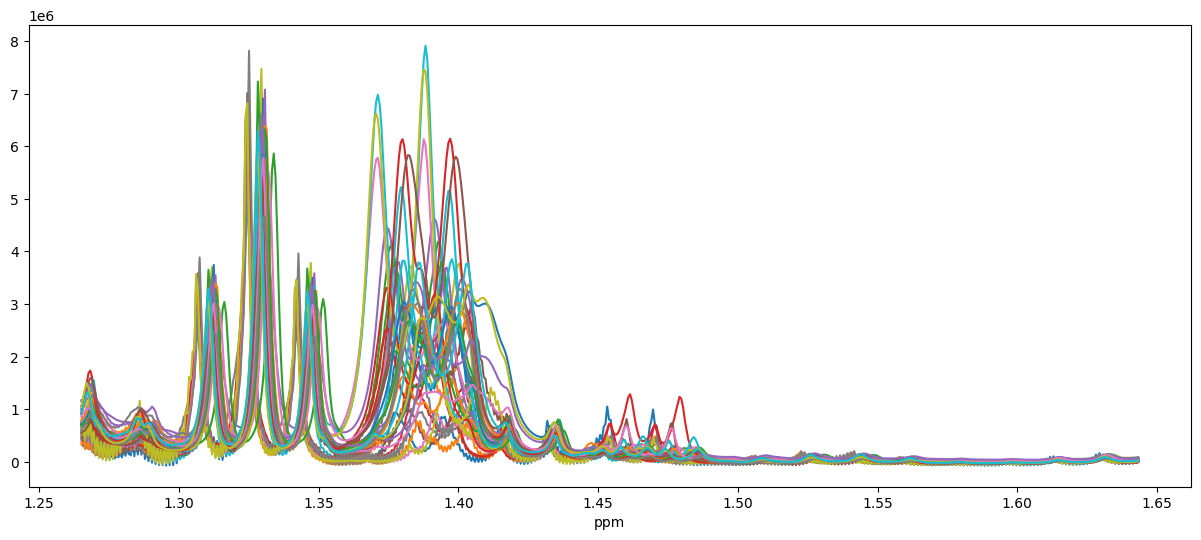

In [11]:
# 1.3-1.6
si = 6900
ei = 7500


print(PPM_WINE)
X = X_WINE[:,si:ei]
print(PPM_WINE[si])
print(PPM_WINE[ei])
ppm = PPM_WINE[si:ei]
plt.figure(figsize=(15,6))
plt.plot(ppm,X.T)
plt.xlabel("ppm")
plt.show()

epoch: 300, Loss: 0.054011396205184456, Tau: 326.01073601953664


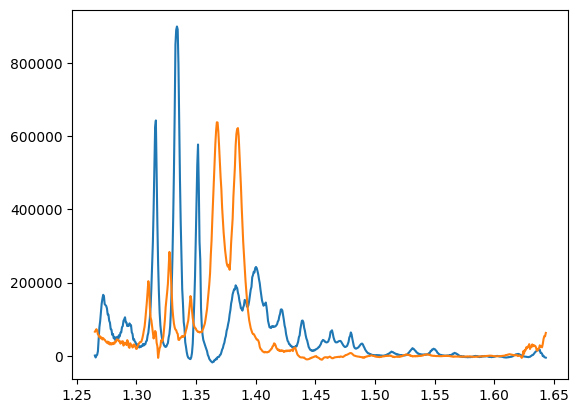

In [21]:

nmf = ShiftNMF(X, 2, lr=0.1, alpha=1e-6, min_imp=0.001)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=300, tau_iter=0, Lambda=0.000)
plt.plot(ppm,H_est.T)
plt.show()


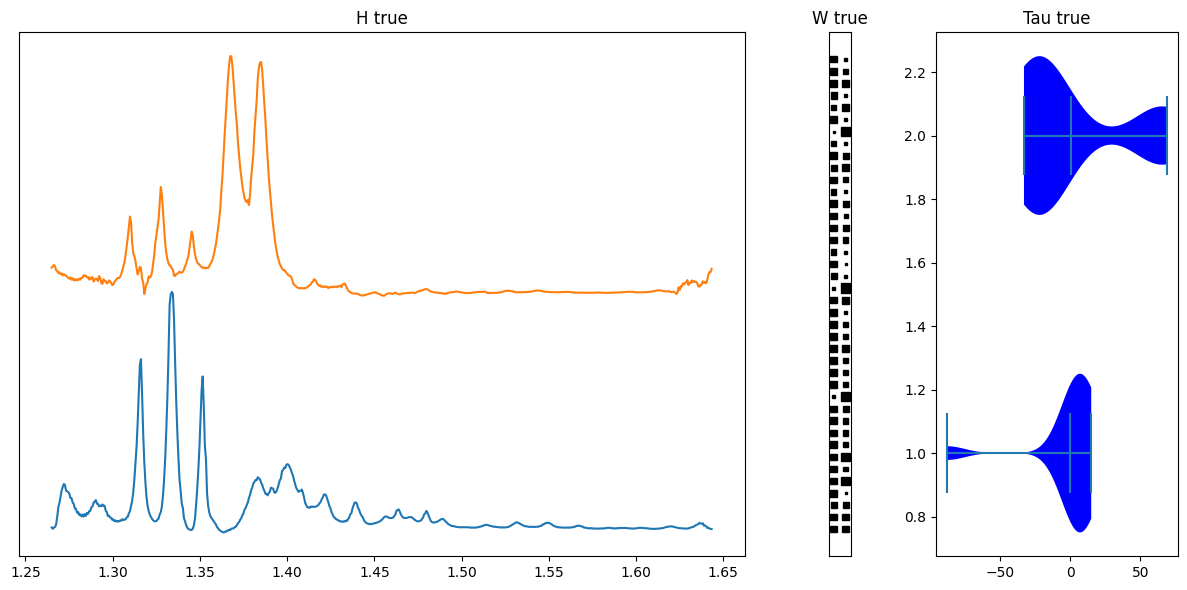

In [22]:
from helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

fig = plt.figure(figsize=(12, 6))
N, M = X[:,0:3000].shape
H_scaled = np.zeros_like(H_est)
for i, vec in enumerate(H_est):
    H_scaled[i] = vec/max(vec)

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, ppm, H_scaled.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

# Hardmodel

Found peaks:[385 412 462 490 518]
sigma: 11.334381141021163 n:0.630363572947893
sigma: 7.210782716920668 n:0.00035483939422825624
sigma: 2.858297764593235 n:0.5366601113197316
sigma: 3.273157019889549 n:7.495726482217944e-08
sigma: 3.2631998966926594 n:0.5555495316906741
Lorentzian %:s: 0.12584876290366415
tensor([8.7685e-01, 6.7115e-05, 4.9799e-01, 4.8143e-08, 6.2473e-01],
       grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([10.4483,  7.8630,  2.8867,  3.3774,  3.3224], requires_grad=True)
hypothesises:
{(0, 1, 3, 4), (2,), (3, 4), (0, 1, 3), (1, 2, 3, 4), (0, 2), (1, 3), (0, 2, 4), (0, 1, 2, 4), (4,), (1,), (0, 2, 3, 4), (0, 1, 2), (1, 2, 4), (0, 1), (2, 4), (1, 2), (0, 4), (0, 2, 3), (0, 1, 2, 3), (0,), (3,), (0, 1, 4), (0, 3, 4), (0, 3), (1, 2, 3), (1, 4), (1, 3, 4), (2, 3), (2, 3, 4), (0, 1, 2, 3, 4)}


c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\helpers\fit_functions.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
c:\Users\Lenovo\OneDrive\Skrivebord\Bachelor project\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.3739e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


epoch: 1, Loss: 0.14260729093644647
epoch: 2, Loss: 0.14260729093644647
FINAL FOUND VALUES
means:
[451.  490.  437.5 465.  476.  490. ]
means in ppm
[1.3585553008012408, 1.3339317204756203, 1.3673945347642844, 1.349716066838198, 1.342770954438664, 1.3339317204756203]
sigmas:
[5.6201954 3.1045513 6.912866  5.5926857 3.132061  3.195503 ]
J coupling:
[ 78.  56. 105. 106.  28.  28.]
coupling in ppm
[1.594057748530898, 1.6079479733299662, 1.5770106544593148, 1.5763792806048116, 1.6256264412560535, 1.6256264412560535]
multiplicity
[2 2 2 2 2 3]
N
[1.7975846e-06 5.6237966e-01 5.8515108e-04 1.0460035e-02 2.1848794e-04
 4.2815637e-03]
W:
[[0.         0.         0.         0.         0.         0.
  0.27839965 0.         0.         0.         0.         0.
  0.         0.         0.         0.46072137 0.         0.
  0.         0.         0.         0.         0.         0.
  4.017892   0.         2.9002242  0.         0.7455978  5.134909
  0.        ]]
Found peaks:[409 437 472 500 528]
sigma: 6

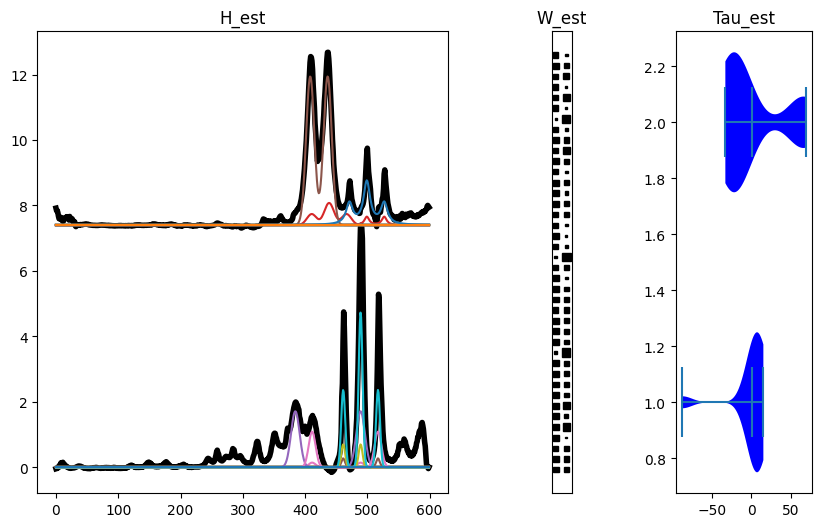

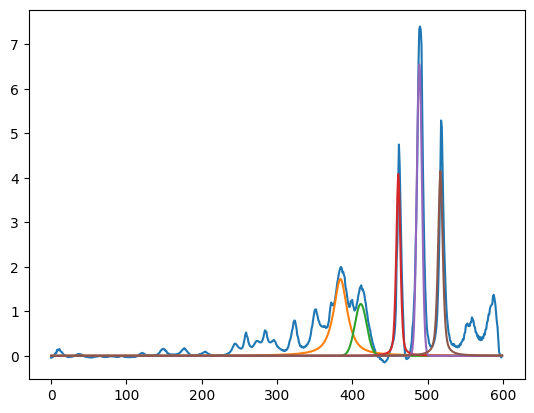

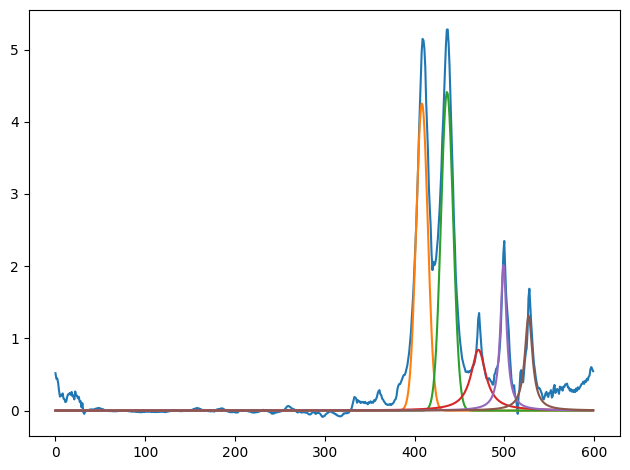

In [32]:
from helpers.plot import *
fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []
losses = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], min_height=2/10, min_sigma=1, lr=0.1 , plot=True)
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)

    W, C, running_loss, path, lambdas, loss = hardmodel.fit(threshold=0.25, verbose=True, return_loss=True)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    losses.append(loss)
    means, sigma, j_coup, mult, n = hardmodel.return_values()
    print("FINAL FOUND VALUES")
    print("means:")
    print(means)
    print("means in ppm")
    print([ppm[int(m)] for m in means])
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("coupling in ppm")
    print([ppm[0]-ppm[int(m)] for m in j_coup])
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(ppm,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(ppm,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[1.0, 0.6028019736497402, 0.567707368143851, 0.46885424575425083, 0.4204954718538275, 0.4024644205204738, 0.3793991431387952, 0.3653259928943371, 0.3625788694420921, 0.33979094147372385, 0.33307135137380256, 0.32438335643598526, 0.31874890463526584, 0.3180448413927092, 0.3167839364256922, 0.31345748012132096, 0.31282419317804544, 0.3096268666199797, 0.3083337315953825, 0.3072426641389296, 0.30649959108301456, 0.3012359671485423, 0.3011930711848179, 0.30093922141517526, 0.30047253122485224, 0.30045684428009733, 0.29938195207002105, 0.2926883921644068, 0.2915898878033625, 0.2910599521998751, 0.2909250452238383, 0.29086911508809304]
[29 24 17  6 26 23 22 28 20 14 15 11  4  9 21  2 10  1  0 27 19 16 13 12
  8  7 25  5  3 18 30]


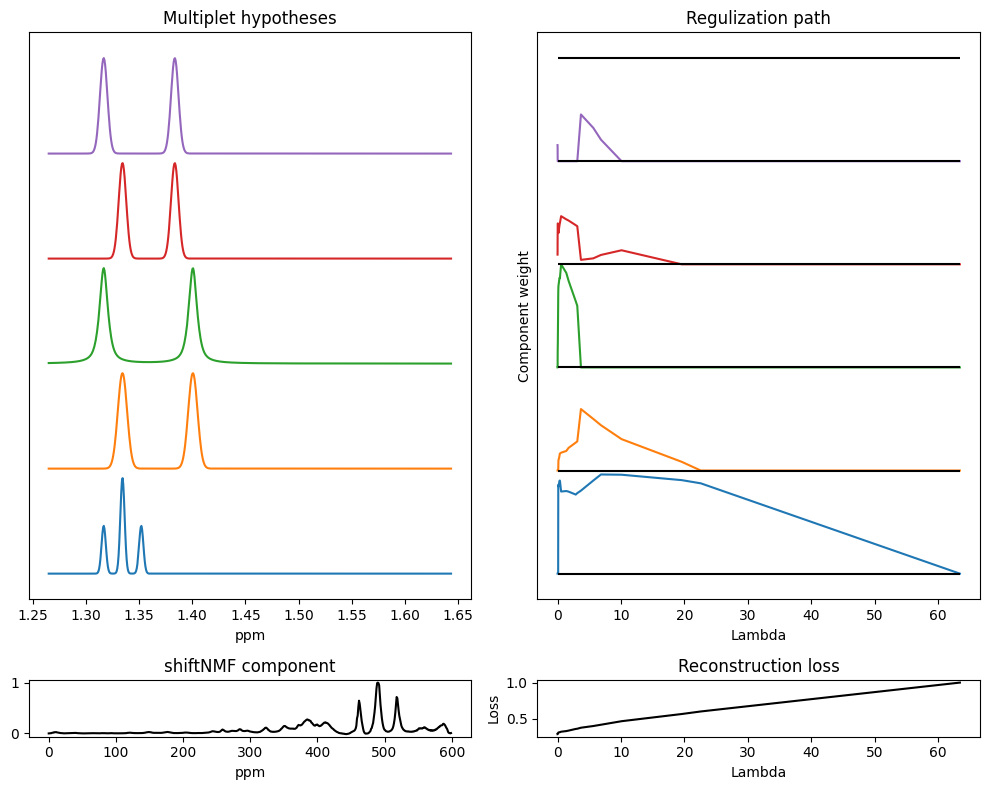

[1.0, 0.380586196685863, 0.3452507108016259, 0.33247983974643924, 0.20665139809256122, 0.18011429554616612, 0.17649937233819274, 0.17613522218004302, 0.16994389102088664, 0.16646524317302852, 0.16176336982024558, 0.15941206290282064, 0.15805744934702437, 0.1555188843293916, 0.15444580872831656, 0.15369745010082414, 0.15303965136404374, 0.15290146057796997, 0.152810827271529]
[14 29 12  2 24  4 23  3 21 27 20  9  5 25  0 26 28 22 19 15 17 16 13 11
 10  8  7  6  1 18 30]


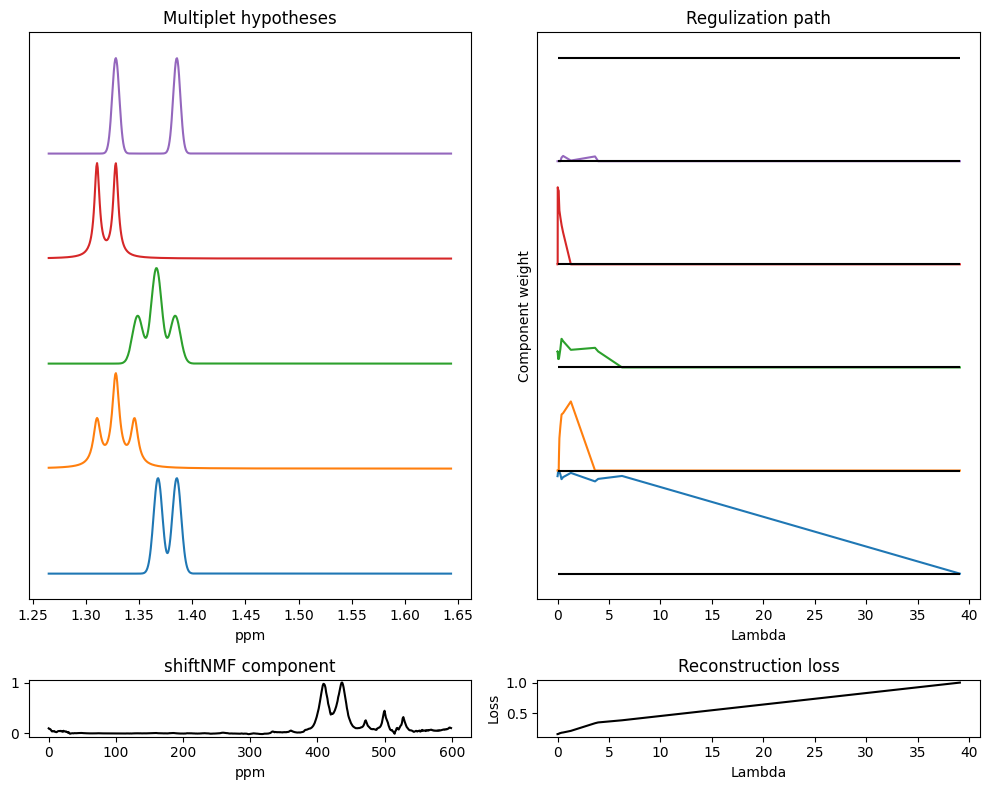

In [33]:

for i in range(len(reg_paths)):
    path = reg_paths[i][0]
    lambdas = lambda_axis[i][0]
    C = C_path[i]
    loss = losses[i]
    print(loss)
    fig = plt.figure(figsize=(10, 8))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regulization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ax3 = plt.subplot(gs[2])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax3.set_title('shiftNMF component')
    ax3.plot(ppm, H_est[i]/max(H_est[i]), color="k")
    ax3.set_xlabel("ppm")

    ax4 = plt.subplot(gs[3])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax4.set_title('Reconstruction loss')
    ax4.plot(lambdas, loss, color="k")
    ax4.set_xlabel("Lambda")
    ax4.set_ylabel("Loss")

   
    sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
    print(sort_indices)
    path = path[sort_indices]
    C = C[sort_indices]

    ymax = 1.1
    yoffset = ymax
    t = 0

    nr_of_components = 5

    for j in range(nr_of_components):
            ax1.plot(ppm,C[j]/max(C[j])+yoffset*t)
            t += 1

    
    ymax = path[:nr_of_components].max()
    yoffset = ymax
    t = 0
    for j in range(nr_of_components):
            ax2.plot(lambdas,path[j]+yoffset*t)
            ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")


    plt.tight_layout()
    plt.show()